In [150]:
#Importing necessary arrays
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [151]:
#Loading CIFAR-10 dataset
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

In [152]:
X_test.shape

(10000, 32, 32, 3)

In [153]:
X_train.shape

(50000, 32, 32, 3)

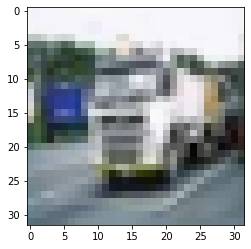

In [154]:
#32*32 image
plt.imshow(X_train[1000])

In [155]:
#32*32*3 3D array
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [156]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [157]:
#Reshaping y_train from a 2D array into a 1D array
#-1 for ALL 10,000 rows, blank for flattening arrays, 2D to 1D, 1D to number
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [158]:
#List of classes used in this project
classlist = ["Airplane", "Automobile", "Bird", "Cat","Deer","Dog","Frog","Horse", "Ship", "Truck"]

In [159]:
#Plotter function to plot samples
def plotter(X, y ,index):
    plt.figure(figsize = (15,3))
    plt.imshow(X[index])
    plt.xlabel(classlist[y[index]])

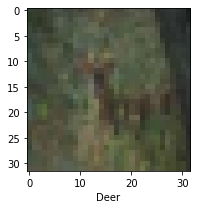

In [160]:
plotter(X_train, y_train, 10)

In [162]:
#Normalizing data
#RGB values range from 0 to 255. Dividing by 255, we get a value from 0 to 1.
X_train = X_train/255
X_test = X_test/255

In [120]:
#Building ANN
#Input layer is a flatten layer that takes input in the shape of 32*32*3
#Hidden layer one has 3000 neurons, uses ReLU as activation function
#Hidden layer two has 1000 neurons, uses ReLU as activation function
#Output layer has 10 categories, uses sigmoid as activation function
#Training ANN for 5 epochs
ann_model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation = 'relu'),
        keras.layers.Dense(1000, activation = 'relu'),
        keras.layers.Dense(10, activation = 'sigmoid')
    ])

ann_model.compile(optimizer='SGD',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
ann_model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.8579 - accuracy: 0.3351
Epoch 2/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.6554 - accuracy: 0.4123
Epoch 3/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5685 - accuracy: 0.4456
Epoch 4/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.5052 - accuracy: 0.4672
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.4575 - accuracy: 0.4855
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.4129 - accuracy: 0.5040
Epoch 7/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.3731 - accuracy: 0.5161
Epoch 8/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.3370 - accuracy: 0.5294
Epoch 9/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3054 - accuracy: 0.5379
Epoch 10/10
1563/1563 [==============================] - 42s 27m

In [123]:
#Building CNN similar to ANN

cnn_model = keras.Sequential([
        
        #CNN
        keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
    
        keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
    
        #Dense
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax')
    ])

cnn_model.compile(optimizer='SGD',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 20s 13ms/step - loss: 2.0254 - accuracy: 0.2627
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.6154 - accuracy: 0.4248
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.4273 - accuracy: 0.4920
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3295 - accuracy: 0.5287
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.2579 - accuracy: 0.5543
Epoch 6/10
1563/1563 [==============================] - 20s 12ms/step - loss: 1.1952 - accuracy: 0.5792
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1356 - accuracy: 0.6023
Epoch 8/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0805 - accuracy: 0.6207
Epoch 9/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0305 - accuracy: 0.6391
Epoch 10/10
1563/1563 [==============================] - 18s 12m

In [163]:
#Reshaping y_test from 2D to 1D
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

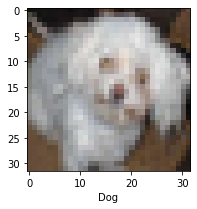

In [165]:
plotter(X_test,y_test,1000)

In [166]:
#Comparing classification results
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Results for ANN\n", classification_report(y_test, y_pred_classes))

y_pred1 = cnn_model.predict(X_test)
y_pred_classes1 = [np.argmax(element) for element in y_pred]

print("Classification Results for CNN\n", classification_report(y_test, y_pred_classes))

Classification Results for ANN
               precision    recall  f1-score   support

           0       0.54      0.67      0.60      1000
           1       0.54      0.76      0.63      1000
           2       0.43      0.35      0.38      1000
           3       0.34      0.32      0.33      1000
           4       0.61      0.21      0.31      1000
           5       0.30      0.65      0.41      1000
           6       0.51      0.64      0.57      1000
           7       0.72      0.38      0.49      1000
           8       0.75      0.56      0.64      1000
           9       0.67      0.40      0.51      1000

    accuracy                           0.49     10000
   macro avg       0.54      0.49      0.49     10000
weighted avg       0.54      0.49      0.49     10000

Classification Results for CNN
               precision    recall  f1-score   support

           0       0.54      0.67      0.60      1000
           1       0.54      0.76      0.63      1000
           2  

In [168]:
#Evaluating models 

print("ANN :")
ann_model.evaluate(X_test,y_test)

print("\n")

print("CNN :")
cnn_model.evaluate(X_test,y_test)

ANN :
313/313 [==============================] - 3s 9ms/step - loss: 1.4170 - accuracy: 0.4929


CNN :
313/313 [==============================] - 3s 10ms/step - loss: 1.0466 - accuracy: 0.6354


[1.0466017723083496, 0.6353999972343445]